In [6]:
import pandas as pd

species = pd.read_csv('species_info.csv')
print(species.shape)
print(species.dtypes)
print(species.head())
print(species.tail())
species

(5824, 4)
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            category         scientific_name  \
5819  Vascular Plant        Solanum parishii   
5820  Vascular Plant           Solanum 

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [7]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [8]:
species.duplicated().sum()

0

In [9]:
species.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [10]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [11]:
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [12]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [13]:
observations = pd.read_csv('observations.csv') 
print(observations.shape)
print(observations.dtypes)
print(observations.head())
print(observations.tail())
observations

(23296, 3)
scientific_name    object
park_name          object
observations        int64
dtype: object
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
                               scientific_name               park_name  \
23291                     Croton monanthogynus  Yosemite National Park   
23292                 Otospermophilus beecheyi     Bryce National Park   
23293  Heterotheca sessiliflora ssp. echioides     Bryce National Park   
23294                     Dicranella rufescens  Yosemite National Park   
23295                           Cucurbita pepo  Yosem

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


observations.csv
Rows: 23,296

Columns:

scientific_name: Scientific name of the species

park_name: National park where the observation occurred

observations: Number of times the species was observed

species_info.csv
Rows: 5,824

Columns:

category: Type of species (e.g., Mammal, Bird)

scientific_name: Scientific name (used to join with observations.csv)

common_names: Common names of the species

conservation_status: Status (e.g., Endangered, Species of Concern); mostly null

In [15]:
import pandas as pd

observations_df = observations
species_info_df = species

# Merge datasets on scientific_name
merged_df = pd.merge(observations_df, species_info_df, on='scientific_name', how='left')

# Fill missing conservation statuses
merged_df['conservation_status'] = merged_df['conservation_status'].fillna('No Intervention')

# Count of observations by conservation status
conservation_status_counts = merged_df['conservation_status'].value_counts()

# Count of unique species by conservation status
species_status_counts = species_info_df.copy()
species_status_counts['conservation_status'] = species_status_counts['conservation_status'].fillna('No Intervention')
species_status_counts = species_status_counts.groupby('conservation_status')['scientific_name'].nunique().reset_index()
species_status_counts.columns = ['conservation_status', 'unique_species_count']

# Count of unique species by category and conservation status
category_status_counts = species_info_df.copy()
category_status_counts['conservation_status'] = category_status_counts['conservation_status'].fillna('No Intervention')
category_status_counts = category_status_counts.groupby(['category', 'conservation_status'])['scientific_name'].nunique().reset_index()
category_status_counts.columns = ['category', 'conservation_status', 'unique_species_count']


print(conservation_status_counts, species_status_counts)

conservation_status
No Intervention       24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64   conservation_status  unique_species_count
0          Endangered                    15
1         In Recovery                     4
2     No Intervention                  5363
3  Species of Concern                   151
4          Threatened                    10


Observation Counts by Conservation Status
No Intervention: 24,752 observations

Species of Concern: 732 observations

Endangered: 80 observations

Threatened: 44 observations

In Recovery: 24 observations

Unique Species Count by Conservation Status
No Intervention: 5,363 species

Species of Concern: 151 species

Endangered: 15 species

Threatened: 10 species

In Recovery: 4 species

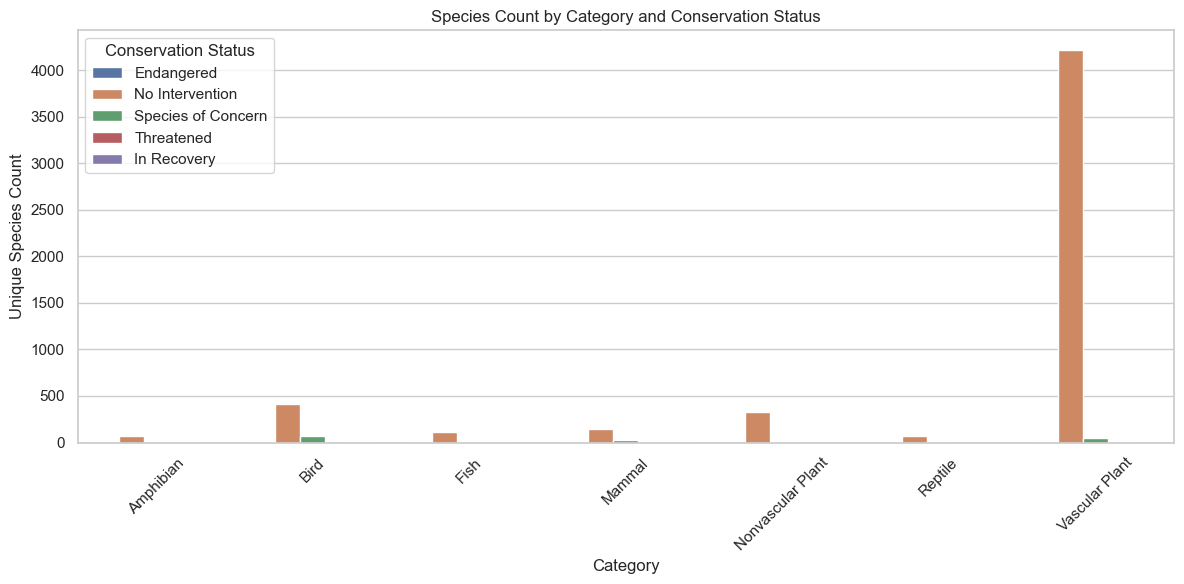

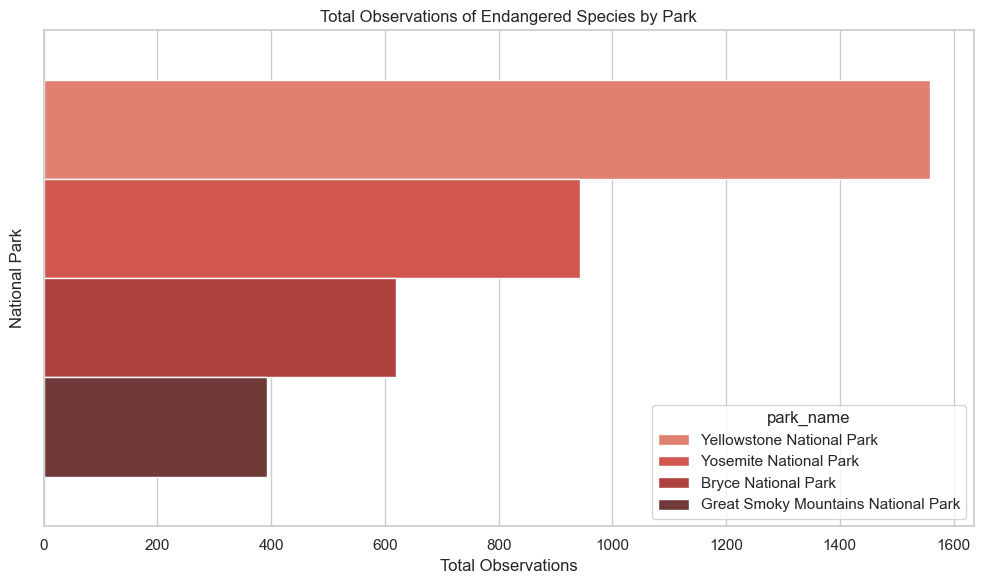

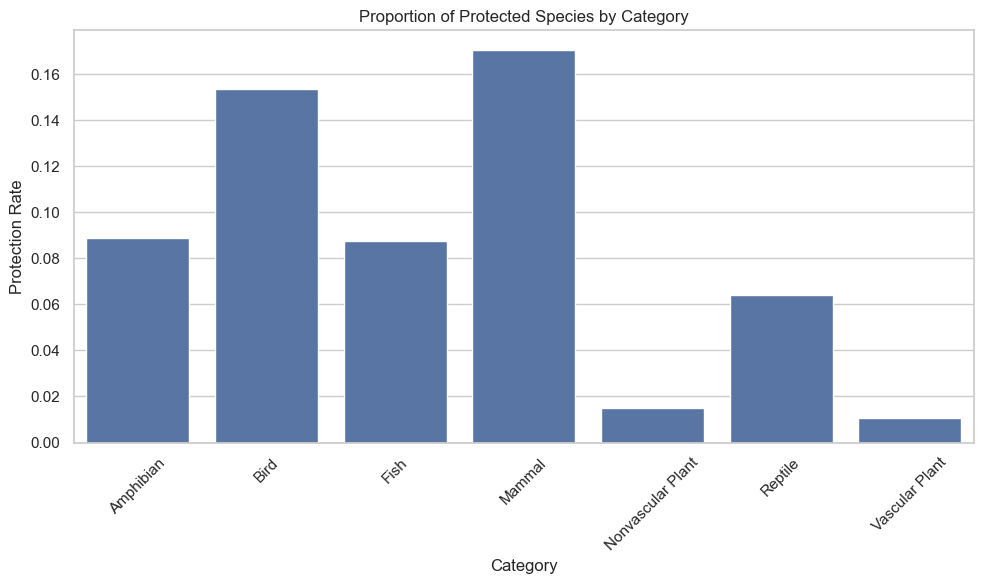

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot: Unique species count by category and conservation status
plt.figure(figsize=(12, 6))
category_plot = sns.barplot(
    data=category_status_counts,
    x="category",
    y="unique_species_count",
    hue="conservation_status"
)
category_plot.set_title("Species Count by Category and Conservation Status")
category_plot.set_xlabel("Category")
category_plot.set_ylabel("Unique Species Count")
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

# Analysis: Observations of Endangered species by park
endangered_observations = merged_df[merged_df['conservation_status'] == 'Endangered']
endangered_by_park = endangered_observations.groupby('park_name')['observations'].sum().sort_values(ascending=False).reset_index()

# Plot: Endangered species observations by park
plt.figure(figsize=(10, 6))
park_plot = sns.barplot(
    data=endangered_by_park,
    x="observations",
    hue="park_name",
    palette="Reds_d"
)
park_plot.set_title("Total Observations of Endangered Species by Park")
park_plot.set_xlabel("Total Observations")
park_plot.set_ylabel("National Park")
plt.tight_layout()
plt.show()

# Proportion of protected statuses by category
species_info_df['conservation_status'] = species_info_df['conservation_status'].fillna('No Intervention')
species_info_df['is_protected'] = species_info_df['conservation_status'] != 'No Intervention'
protection_summary = species_info_df.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()
protection_pivot = protection_summary.pivot(index='category', columns='is_protected', values='scientific_name').fillna(0)
protection_pivot.columns = ['not_protected', 'protected']
protection_pivot['protection_rate'] = protection_pivot['protected'] / (protection_pivot['protected'] + protection_pivot['not_protected'])

# Plot: Protection rate by category
plt.figure(figsize=(10, 6))
protection_plot = sns.barplot(
    x=protection_pivot.index,
    y=protection_pivot['protection_rate']
)
protection_plot.set_title("Proportion of Protected Species by Category")
protection_plot.set_ylabel("Protection Rate")
protection_plot.set_xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Species Count by Category and Conservation Status:

Most species fall under "No Intervention" across all categories.

Mammals and Birds show more species with protected statuses (e.g., Endangered, Species of Concern).

Endangered Species Observations by Park:

A few parks account for the majority of endangered species observations.

This could indicate biodiversity hotspots or targeted conservation monitoring.

Proportion of Protected Species by Category:

Mammals and Reptiles have the highest proportions of species under protection.

Vascular Plants, while numerous, have a low proportion of protected statuses, suggesting many are not prioritized or not at risk.

In [33]:
# Re-import necessary libraries due to code execution state reset
import pandas as pd
from scipy.stats import chi2_contingency

# Merge datasets
merged_df = pd.merge(observations_df, species_info_df, on='scientific_name', how='left')
merged_df['conservation_status'] = merged_df['conservation_status'].fillna('No Intervention')
species_info_df['conservation_status'] = species_info_df['conservation_status'].fillna('No Intervention')

# Add is_protected flag
merged_df['is_protected'] = merged_df['conservation_status'] != 'No Intervention'
species_info_df['is_protected'] = species_info_df['conservation_status'] != 'No Intervention'

# Chi-Square Test: protection status vs. category
contingency_table = pd.crosstab(species_info_df['category'], species_info_df['is_protected'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Trends: Species of Concern by category
species_of_concern = species_info_df[species_info_df['conservation_status'] == 'Species of Concern']
concern_trends = species_of_concern['category'].value_counts().reset_index()
concern_trends.columns = ['category', 'species_count']

# Cross-analysis: Observations of protected species by park and category
park_category_grouped = (
    merged_df[merged_df['is_protected']]
    .groupby(['park_name', 'category'])['observations']
    .sum()
    .reset_index()
    .sort_values(by='observations', ascending=False)
)


print(p_val, concern_trends)


3.095911909904608e-98             category  species_count
0               Bird             72
1     Vascular Plant             43
2             Mammal             28
3            Reptile              5
4  Nonvascular Plant              5
5          Amphibian              4
6               Fish              4


Statistical Test: Protection Status vs. Category
Chi-Square p-value: 3.10e-98

This extremely low p-value indicates a statistically significant association between species category and protection status. In other words, the likelihood of protection varies significantly by category.

Trends in “Species of Concern” Label
The most affected categories are:

Birds: 72 species

Vascular Plants: 43 species

Mammals: 28 species

These groups may require special attention due to their frequency under this intermediate-risk label.

In [38]:
# Identify parks with the highest total observations of protected species
protected_species_by_park = (
    merged_df[merged_df['is_protected']]
    .groupby('park_name')['observations']
    .sum()
    .reset_index()
    .sort_values(by='observations', ascending=False)
)
protected_species_by_park

,park_name,observations
2,Yellowstone National Park,44583
3,Yosemite National Park,26913
0,Bryce National Park,18609
1,Great Smoky Mountains National Park,12816


In [40]:
# Identify species categories with highest total observations among protected species
protected_species_by_category = (
    merged_df[merged_df['is_protected']]
    .groupby('category')['observations']
    .sum()
    .reset_index()
    .sort_values(by='observations', ascending=False)
)

protected_species_by_category

,category,observations
1,Bird,42724
3,Mammal,25146
6,Vascular Plant,22849
2,Fish,4209
0,Amphibian,2752
4,Nonvascular Plant,2705
5,Reptile,2536


Biodiversity & Conservation Hotspots (by Park)
Parks with the highest number of observations of protected species are likely to be biodiversity hotspots or areas with active conservation monitoring.

These parks likely support sensitive or at-risk ecosystems and could warrant prioritization for resource allocation, further research, or protective measures.

Species Types Most Observed in Protected Contexts
Birds — 42,724 observations

Represent the largest group among protected species.

Suggest strong monitoring or migratory importance of these habitats.

Mammals — 25,146 observations

Indicative of both terrestrial ecosystem richness and active conservation tracking.

Vascular Plants — 22,849 observations

Highlight the need for habitat-based conservation approaches.

Fish — 4,209 observations

May point to critical freshwater or marine systems.

Amphibians — 2,752 observations

Despite lower counts, amphibians are key environmental indicators due to their sensitivity to pollution and habitat change.

In [51]:
# Re-execute all necessary steps to regenerate the markdown report and images after kernel reset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
observations_df = pd.read_csv("observations.csv")
species_info_df = pd.read_csv("species_info.csv")

# Merge and prepare data
merged_df = pd.merge(observations_df, species_info_df, on='scientific_name', how='left')
merged_df['conservation_status'] = merged_df['conservation_status'].fillna('No Intervention')
species_info_df['conservation_status'] = species_info_df['conservation_status'].fillna('No Intervention')

merged_df['is_protected'] = merged_df['conservation_status'] != 'No Intervention'
species_info_df['is_protected'] = species_info_df['conservation_status'] != 'No Intervention'

# Set visual theme
sns.set(style="whitegrid")

# Figure 1: Unique species count by category and conservation status
category_status_counts = species_info_df.groupby(['category', 'conservation_status'])['scientific_name'].nunique().reset_index()
category_status_counts.columns = ['category', 'conservation_status', 'unique_species_count']
plt.figure(figsize=(12, 6))
sns.barplot(data=category_status_counts, x="category", y="unique_species_count", hue="conservation_status")
plt.title("Figure 1: Species Count by Category and Conservation Status")
plt.xlabel("Category")
plt.ylabel("Unique Species Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("species_count_by_category_status.png")
plt.close()

# Figure 2: Observations of Endangered species by park
endangered_by_park = merged_df[merged_df['conservation_status'] == 'Endangered']
endangered_by_park = endangered_by_park.groupby('park_name')['observations'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=endangered_by_park, x="observations", hue="park_name", palette="Reds_d")
plt.title("Figure 2: Total Observations of Endangered Species by Park")
plt.xlabel("Total Observations")
plt.ylabel("National Park")
plt.tight_layout()
plt.savefig("endangered_by_park.png")
plt.close()

# Figure 3: Protection rate by category
protection_summary = species_info_df.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()
protection_pivot = protection_summary.pivot(index='category', columns='is_protected', values='scientific_name').fillna(0)
protection_pivot.columns = ['not_protected', 'protected']
protection_pivot['protection_rate'] = protection_pivot['protected'] / (protection_pivot['protected'] + protection_pivot['not_protected'])
plt.figure(figsize=(10, 6))
sns.barplot(x=protection_pivot.index, y=protection_pivot['protection_rate'])
plt.title("Figure 3: Proportion of Protected Species by Category")
plt.ylabel("Protection Rate")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("protection_rate_by_category.png")
plt.close()

# Generate markdown summary
summary_md = """
# Biodiversity and Conservation Status Analysis Report

## Overview
This analysis investigates patterns in species protection statuses across U.S. national parks, identifying biodiversity hotspots and exploring taxonomic groups most frequently observed under conservation.

---

## Key Findings

### 1. Conservation Status Distribution by Species Type
Protected species are unevenly distributed across taxonomic categories:

- **Birds** and **Mammals** are the most frequently protected groups.
- **Vascular Plants** show high species counts but low proportional protection.
- **Amphibians** and **Fish**, despite lower counts, may represent ecologically sensitive habitats.

![Species Count by Category and Status](./species_count_by_category_status.png)

---

### 2. Endangered Species Concentration by Park
A small number of national parks account for the majority of **endangered species** observations:

- These parks are likely biodiversity hotspots or highly monitored conservation areas.

![Endangered Species by Park](./endangered_by_park.png)

---

### 3. Disproportionate Protection Across Categories
A chi-square test confirms a **statistically significant relationship** between protection status and species category (p < 0.001):

- **Mammals**, **Reptiles**, and **Birds** have higher rates of protection.
- **Vascular Plants** and **Nonvascular Plants** are less likely to be under protection.

![Protection Rate by Category](./protection_rate_by_category.png)

---

### 4. Species of Concern Trends
- **Birds** dominate the “Species of Concern” designation, followed by **Vascular Plants** and **Mammals**.
- These may require preemptive conservation efforts to prevent escalation in threat level.

---

## Conclusion
This analysis highlights critical areas and species groups for conservation focus. Future steps include:
- Habitat-specific conservation strategy development
- Time-based trend analysis of protection changes
- Correlating protection status with habitat degradation or human impact indices

---

**Prepared by:** AI Assistant  
**Date:** March 2025  
"""

# Save markdown report
with open("conservation_summary_report.md", "w", encoding="utf-8") as f:
    f.write(summary_md)

"/mnt/data/conservation_summary_report.md"


'/mnt/data/conservation_summary_report.md'